In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('final_dataset.csv')

# Print the first few rows to verify
df.head()  # View the standardized data


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,03-06-2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21


In [11]:
def group_ratings(rating):
    if rating in ['AAA', 'AA']:
        return 'AA+'
    elif rating in ['CCC' , 'C' , 'D' , 'CC']:
        return 'CCC–'
    else:
        return rating

df['Rating'] = df['Rating'].apply(group_ratings)

In [12]:
import numpy as np
np.unique(df["Rating"])

array(['A', 'AA+', 'B', 'BB', 'BBB', 'CCC–'], dtype=object)

In [13]:
df

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,03-06-2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,AA+,"Gartner, Inc.",IT,Egan-Jones Ratings Company,2/18/2016,Consumer Services,0.862111,0.720623,0.281812,97.999541,...,0.159756,2.164291,1.554895,0.499336,1.144049,0.948107,0.145376,0.436129,0.486695,10.42
1485,B,SBA Communications Corporation,SBAC,Standard & Poor's Ratings Services,8/28/2013,Consumer Services,0.459629,0.266021,0.163323,19.955103,...,0.381332,16.799152,0.523903,0.611220,1.637197,0.349269,0.218293,0.414757,0.261952,12.08
1486,AA+,Imperial Oil Limited,IMO,DBRS,10-07-2016,Energy,0.986608,0.886943,0.100695,26.994041,...,0.073664,0.000000,0.000000,0.000000,4.716981,0.000000,0.000000,0.943396,0.000000,15.35
1487,BBB,"NVR, Inc.",NVR,Moody's Investors Service,09-05-2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.083018,15.758348,1.847731,0.783593,1.518816,1.364032,0.212828,0.222502,0.657831,12.16


In [14]:
df["Rating"].value_counts()

,count
Rating,
BBB,511
BB,333
A,320
B,190
AA+,87
CCC–,48


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to 'Agency' column
df['Sector'] = label_encoder.fit_transform(df['Sector'])

In [16]:
df.drop(["Name" , "Symbol" , "Date" , "Rating Agency Name"] , axis = 1 , inplace = True)
df

,Rating,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,A,2,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,BBB,2,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,BBB,2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,BBB,2,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,BBB,2,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,AA+,4,0.862111,0.720623,0.281812,97.999541,0.081198,0.125846,0.612088,0.133144,...,0.159756,2.164291,1.554895,0.499336,1.144049,0.948107,0.145376,0.436129,0.486695,10.42
1485,B,4,0.459629,0.266021,0.163323,19.955103,-0.042847,-0.043850,0.687130,0.175991,...,0.381332,16.799152,0.523903,0.611220,1.637197,0.349269,0.218293,0.414757,0.261952,12.08
1486,AA+,5,0.986608,0.886943,0.100695,26.994041,0.079147,0.089347,1.000000,0.089347,...,0.073664,0.000000,0.000000,0.000000,4.716981,0.000000,0.000000,0.943396,0.000000,15.35
1487,BBB,1,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,...,0.083018,15.758348,1.847731,0.783593,1.518816,1.364032,0.212828,0.222502,0.657831,12.16


In [17]:

columns_to_standardize = df.columns[1:]
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.to_csv('standardized_dataset.csv', index=False)

df

,Rating,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,A,-0.824698,-0.060702,-0.068602,-0.147666,-0.069133,-0.039618,-0.042436,-0.542408,-0.045665,...,-0.064850,-0.051142,0.175272,0.913171,0.810471,0.859724,0.165990,0.289363,0.945833,-0.046131
1,BBB,-0.824698,-0.058993,-0.066727,-0.122688,-0.070148,-0.038469,-0.042492,-0.543984,-0.045225,...,-0.064444,-0.051033,1.513844,0.358279,0.483632,1.224594,0.112018,0.092125,-0.070330,-0.120508
2,BBB,-0.824698,-0.060354,-0.067947,-0.142254,-0.067839,-0.040450,-0.043002,-0.552371,-0.045816,...,-0.064104,-0.051620,1.787455,0.042578,0.708041,1.098523,-0.426932,0.090832,-0.443123,-0.089669
3,BBB,-0.824698,-0.059260,-0.066409,-0.129210,-0.069725,-0.042511,-0.049447,-0.608807,-0.047332,...,-0.066280,-0.050380,1.826036,1.663444,0.266948,0.842292,-0.360732,-0.076955,-0.314728,0.039130
4,BBB,-0.824698,-0.060469,-0.066800,-0.137543,-0.068440,-0.038679,-0.041938,-0.540533,-0.045329,...,-0.064877,-0.051197,-0.261966,1.266931,1.156623,-0.209053,0.097338,0.151075,0.872238,0.042758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,AA+,-0.247506,-0.062334,-0.060920,-0.103684,-0.058651,-0.031991,-0.033816,0.207196,-0.039406,...,-0.060071,-0.053110,0.238057,-0.868995,-0.279192,0.356966,-0.383560,0.233033,-0.364923,-0.100553
1485,B,-0.247506,-0.070177,-0.072790,-0.132299,-0.073858,-0.053630,-0.052939,0.336376,-0.035662,...,-0.049598,-0.036578,-1.357740,-0.503985,0.514840,-0.726876,0.181169,0.150374,-1.005653,0.200582
1486,AA+,0.041090,-0.059908,-0.056577,-0.147423,-0.072486,-0.032349,-0.037929,0.874956,-0.043233,...,-0.064140,-0.055555,-2.168651,-2.498032,5.473689,-1.359020,-1.509481,2.194898,-1.752461,0.793781
1487,BBB,-1.113294,0.149986,0.106042,1.532614,-0.077536,-0.036264,-0.038264,0.874956,-0.044238,...,-0.063698,-0.037754,0.691317,0.058365,0.324231,1.109753,0.138841,-0.593175,0.122976,0.215094


In [21]:
label_encoder2 = LabelEncoder()
df['Rating'] = label_encoder2.fit_transform(df['Rating'])

y = df["Rating"]
X = df.drop(["Rating"] , axis = 1)

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [24]:
df

,Rating,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,0,-0.824698,-0.060702,-0.068602,-0.147666,-0.069133,-0.039618,-0.042436,-0.542408,-0.045665,...,-0.064850,-0.051142,0.175272,0.913171,0.810471,0.859724,0.165990,0.289363,0.945833,-0.046131
1,4,-0.824698,-0.058993,-0.066727,-0.122688,-0.070148,-0.038469,-0.042492,-0.543984,-0.045225,...,-0.064444,-0.051033,1.513844,0.358279,0.483632,1.224594,0.112018,0.092125,-0.070330,-0.120508
2,4,-0.824698,-0.060354,-0.067947,-0.142254,-0.067839,-0.040450,-0.043002,-0.552371,-0.045816,...,-0.064104,-0.051620,1.787455,0.042578,0.708041,1.098523,-0.426932,0.090832,-0.443123,-0.089669
3,4,-0.824698,-0.059260,-0.066409,-0.129210,-0.069725,-0.042511,-0.049447,-0.608807,-0.047332,...,-0.066280,-0.050380,1.826036,1.663444,0.266948,0.842292,-0.360732,-0.076955,-0.314728,0.039130
4,4,-0.824698,-0.060469,-0.066800,-0.137543,-0.068440,-0.038679,-0.041938,-0.540533,-0.045329,...,-0.064877,-0.051197,-0.261966,1.266931,1.156623,-0.209053,0.097338,0.151075,0.872238,0.042758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1,-0.247506,-0.062334,-0.060920,-0.103684,-0.058651,-0.031991,-0.033816,0.207196,-0.039406,...,-0.060071,-0.053110,0.238057,-0.868995,-0.279192,0.356966,-0.383560,0.233033,-0.364923,-0.100553
1485,2,-0.247506,-0.070177,-0.072790,-0.132299,-0.073858,-0.053630,-0.052939,0.336376,-0.035662,...,-0.049598,-0.036578,-1.357740,-0.503985,0.514840,-0.726876,0.181169,0.150374,-1.005653,0.200582
1486,1,0.041090,-0.059908,-0.056577,-0.147423,-0.072486,-0.032349,-0.037929,0.874956,-0.043233,...,-0.064140,-0.055555,-2.168651,-2.498032,5.473689,-1.359020,-1.509481,2.194898,-1.752461,0.793781
1487,4,-1.113294,0.149986,0.106042,1.532614,-0.077536,-0.036264,-0.038264,0.874956,-0.044238,...,-0.063698,-0.037754,0.691317,0.058365,0.324231,1.109753,0.138841,-0.593175,0.122976,0.215094


In [25]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[38  5  2  6 13  0]
 [10  6  0  0  5  0]
 [ 6  0 12 10  9  1]
 [21  1  8 17 13  0]
 [37  8  3 14 46  0]
 [ 0  0  4  1  1  1]]
0.40268456375838924


In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[10  3  1  1 48  1]
 [ 4  4  0  1 11  1]
 [ 3  0  4 14 14  3]
 [ 5  0  4 16 35  0]
 [13  2  1  8 84  0]
 [ 0  0  1  4  2  0]]
0.3959731543624161


In [32]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[  8   0   0   1  55   0]
 [  2   1   0   0  18   0]
 [  1   0  13   3  21   0]
 [  3   0   7   5  45   0]
 [  5   0   2   1 100   0]
 [  0   0   2   1   4   0]]
0.4261744966442953


In [33]:
!pip install catboost xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [34]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# import warnings
# warnings.filterwarnings('ignore')

# 1. CatBoost
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# 2. XGBoost
xgboost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)

# 3. LightGBM
lightgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
lightgbm_model.fit(X_train, y_train)
y_pred_lightgbm = lightgbm_model.predict(X_test)
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
conf_matrix_lightgbm = confusion_matrix(y_test, y_pred_lightgbm)

# Displaying the results
print(f"CatBoost Accuracy: {accuracy_catboost}")
print(f"CatBoost Confusion Matrix:\n{conf_matrix_catboost}\n")

print(f"XGBoost Accuracy: {accuracy_xgboost}")
print(f"XGBoost Confusion Matrix:\n{conf_matrix_xgboost}\n")

print(f"LightGBM Accuracy: {accuracy_lightgbm}")
print(f"LightGBM Confusion Matrix:\n{conf_matrix_lightgbm}\n")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:09:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8427
[LightGBM] [Info] Number of data points in the train set: 1191, number of used features: 34
[LightGBM] [Info] Start training from score -1.537371
[LightGBM] [Info] Start training from score -2.892894
[LightGBM] [Info] Start training from score -2.058668
[LightGBM] [Info] Start training from score -1.473077
[LightGBM] [Info] Start training from score -1.083612
[LightGBM] [Info] Start training from score -3.368977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Displaying the results
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}\n")

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Confusion Matrix:\n{conf_matrix_dt}\n")

Random Forest Accuracy: 0.4899328859060403
Random Forest Confusion Matrix:
[[21  0  0  2 41  0]
 [ 9  0  1  1 10  0]
 [ 0  0 15  8 15  0]
 [ 2  0  5 22 31  0]
 [ 9  1  1  9 88  0]
 [ 0  0  4  2  1  0]]

Decision Tree Accuracy: 0.45302013422818793
Decision Tree Confusion Matrix:
[[21  4  0  4 35  0]
 [ 5  3  0  1 12  0]
 [ 3  0 10 10 12  3]
 [ 1  3  5 20 30  1]
 [16  2  2  8 80  0]
 [ 1  0  2  3  0  1]]



In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# # Example dataset (replace with your own dataset)
# from sklearn.datasets import load_iris
# data = load_iris()
# X = data.data
# y = data.target

# # Ensure we're working with NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ("catboost", CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)),
    ("lightgbm", LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)),
    ("random_forest", RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))
]

# Hold predictions from base models for stacking
stack_train = np.zeros((X_train.shape[0], len(base_models)))
stack_test = np.zeros((X_test.shape[0], len(base_models)))

# Stratified K-Folds for base models
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train each base model and store their predictions for stacking
for i, (name, model) in enumerate(base_models):
    fold_train = np.zeros((X_train.shape[0],))  # for storing predictions on training set
    fold_test = np.zeros((X_test.shape[0], 5))  # 5-fold test predictions for averaging

    for j, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
        # Split data using the indices provided by K-Fold
        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

        # Fit the model on this fold
        model.fit(X_fold_train, y_fold_train)

        # Predict validation set (for stacking), flatten the predictions to avoid shape mismatch
        fold_train[val_idx] = model.predict(X_fold_val).ravel()

        # Predict on the test set and store for averaging
        fold_test[:, j] = model.predict(X_test).ravel()

    # Store the average of the fold test predictions
    stack_train[:, i] = fold_train
    stack_test[:, i] = fold_test.mean(axis=1)

# Stacker Model (Meta Layer)
stacker = LogisticRegression()
stacker.fit(stack_train, y_train)

# Final predictions
final_predictions = stacker.predict(stack_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f"Stack Ensemble Accuracy: {accuracy}")

conf_matrix_dt = confusion_matrix(y_test, final_predictions)
print(conf_matrix_dt)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8425
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 34
[LightGBM] [Info] Start training from score -1.535555
[LightGBM] [Info] Start training from score -2.888273
[LightGBM] [Info] Start training from score -2.062774
[LightGBM] [Info] Start training from score -1.474070
[LightGBM] [Info] Start training from score -1.084013
[LightGBM] [Info] Start training from score -3.362057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Stack Ensemble Accuracy: 0.412751677852349
[[35  0  0  0 29  0]
 [14  0  0  0  7  0]
 [ 6  0  0  0 32  0]
 [ 5  0  0  0 55  0]
 [20  0  0  0 88  0]
 [ 0  0  0  0  7  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_1 = to_categorical(y_train, num_classes=6)
y_test_1 = to_categorical(y_test, num_classes=6)



# Define the model
model = Sequential()

# Input and Hidden Layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output Layer
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_1, epochs=10, batch_size=32, validation_data=(X_test, y_test_1), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2242 - loss: 1.7759 - val_accuracy: 0.3624 - val_loss: 1.7085
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3394 - loss: 1.6424 - val_accuracy: 0.3691 - val_loss: 1.5938
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3402 - loss: 1.5214 - val_accuracy: 0.3893 - val_loss: 1.5285
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3762 - loss: 1.4724 - val_accuracy: 0.3792 - val_loss: 1.5048
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3646 - loss: 1.4255 - val_accuracy: 0.4027 - val_loss: 1.4709
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4132 - loss: 1.3591 - val_accuracy: 0.3960 - val_loss: 1.4501
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4186 - loss: 1.3262 - val_accuracy: 0.4262 - val_loss: 1.4959
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4281 - loss: 1.2767 - val_accuracy: 0.4128 - val_loss

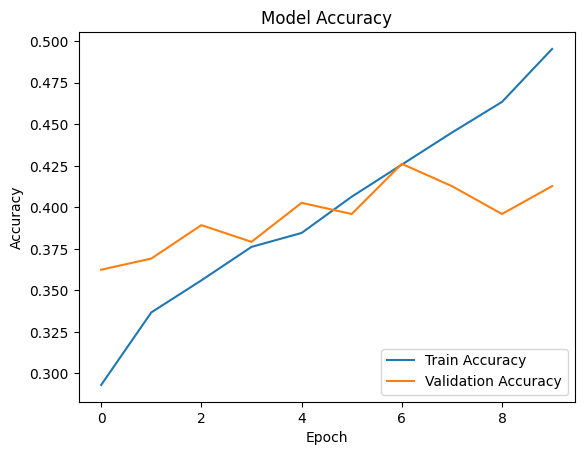

In [46]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
